# Laboratorio 2 - Series de tiempo

##### Sebastian Aristondo 20880
##### Daniel Gonzalez 20293

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

## 1. Análisis expolatorio

### 1.1 Consumo de combustibles

In [80]:
consumo = pd.read_csv('consumo.csv', sep=',')
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas oleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


In [81]:
columns_to_convert = [col for col in consumo.columns if col != 'Fecha']
consumo[columns_to_convert] = consumo[columns_to_convert].apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' else x)\

consumo.describe()

,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,...,Kerosina,Mezclas oleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
count,281.000000,281.000000,281.000000,280.000000,281.000000,2.810000e+02,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,2.810000e+02,281.000000,2.810000e+02
mean,4291.018078,28320.540961,306899.841210,-1.695929,35953.793274,2.603631e+05,2303.973381,303105.399893,1223.807224,367626.393559,...,19774.585089,212.063772,15.754626,123875.779786,53618.566263,1807.681779,10.289893,5.925927e+05,14228.544484,2.573688e+06
std,9060.350581,15061.399091,149027.263795,120.930501,23392.884977,4.804376e+05,4363.660816,101787.584005,353.009681,192320.697474,...,21811.283087,613.181249,57.585737,114615.582775,32948.218215,3934.695321,23.760251,3.478895e+05,45343.764687,6.235583e+05
min,0.000000,2287.930000,33606.200000,-841.640000,0.000000,0.000000e+00,0.000000,167818.140000,0.000000,160741.900000,...,-4603.490000,0.000000,-22.460000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.673279e+06
25%,0.000000,17687.890000,162734.650000,0.000000,18507.790000,0.000000e+00,0.000000,225593.820000,1003.000000,213645.390000,...,758.660000,0.000000,0.000000,69055.690000,35207.320000,0.000000,0.000000,5.578026e+05,0.000000,2.114746e+06
50%,0.000000,25774.420000,304037.550000,0.000000,39135.650000,0.000000e+00,0.000000,256040.100000,1224.040000,275031.210000,...,10620.700000,0.000000,0.000000,96222.500000,45686.000000,0.000000,0.000000,6.998072e+05,0.000000,2.394185e+06
75%,0.000000,35584.540000,406269.280000,0.000000,50690.500000,0.000000e+00,0.000000,373503.780000,1458.000000,502041.670000,...,31964.770000,0.000000,0.000000,142986.060000,70523.000000,0.000000,0.000000,8.076921e+05,0.000000,2.928755e+06
max,31025.180000,77035.870000,697861.800000,919.240000,94150.680000,1.463008e+06,16475.250000,588892.160000,2734.000000,875010.340000,...,70821.940000,3134.830000,525.040000,748589.980000,137937.120000,16166.190000,89.720000,1.216423e+06,184302.000000,4.473316e+06


In [82]:
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b/%Y')
consumo.dtypes

Fecha                       datetime64[ns]
Aceites lubricantes                float64
Asfalto                            float64
Bunker                             float64
Ceras                              float64
Combustible turbo jet              float64
Diesel bajo azufre                 float64
Diesel ultra bajo azufre           float64
Gas licuado de petróleo            float64
Gasolina de aviación               float64
Gasolina regular                   float64
Gasolina superior                  float64
Grasas lubricantes                 float64
Kerosina                           float64
Mezclas oleosas                    float64
Naftas                             float64
PetCoke                            float64
Petróleo crudo                     float64
Solventes                          float64
Butano                             float64
Diesel alto azufre                 float64
Orimulsión                         float64
Total                              float64
dtype: obje

In [83]:
consumo["Diesel_conjunto"] = consumo["Diesel alto azufre"] + consumo["Diesel bajo azufre"]
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].fillna(0)
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].astype(float)
consumo.dropna(subset=["Diesel_conjunto"], inplace=True)

nans_por_columna = consumo.isna().sum()

print("Valores NaN por columna:")
print(nans_por_columna)

Valores NaN por columna:
Fecha                       0
Aceites lubricantes         0
Asfalto                     0
Bunker                      0
Ceras                       1
Combustible turbo jet       0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Gas licuado de petróleo     0
Gasolina de aviación        0
Gasolina regular            0
Gasolina superior           0
Grasas lubricantes          0
Kerosina                    0
Mezclas oleosas             0
Naftas                      0
PetCoke                     0
Petróleo crudo              0
Solventes                   0
Butano                      0
Diesel alto azufre          0
Orimulsión                  0
Total                       0
Diesel_conjunto             0
dtype: int64


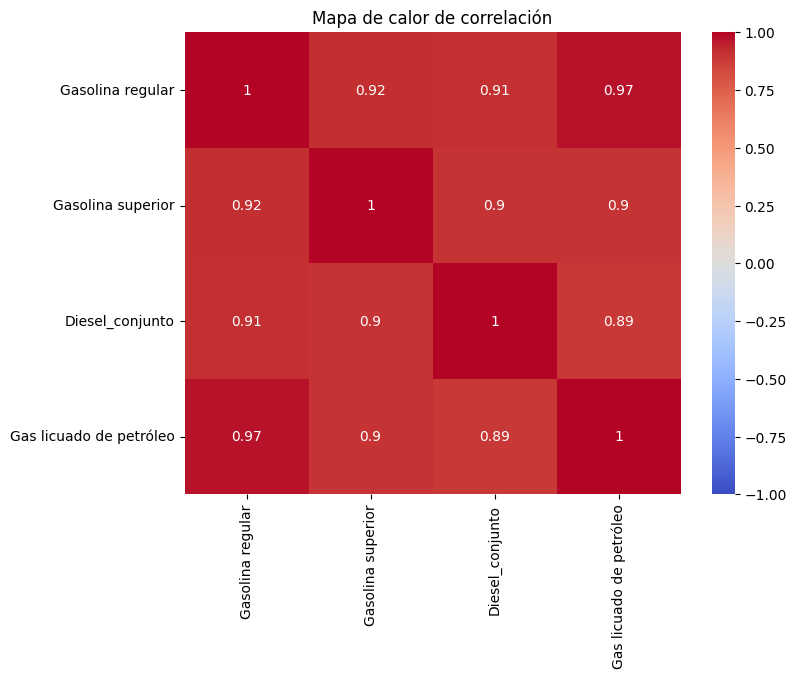

In [84]:
columnas_interes = ["Gasolina regular", "Gasolina superior", "Diesel_conjunto", "Gas licuado de petróleo"]
consumo_numericas = consumo[columnas_interes]

correlation_matrix = consumo_numericas.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación')
plt.show()

c:\Users\Daniel\Main\UVG\Semestre VIII\Data science\Lab2_DS\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


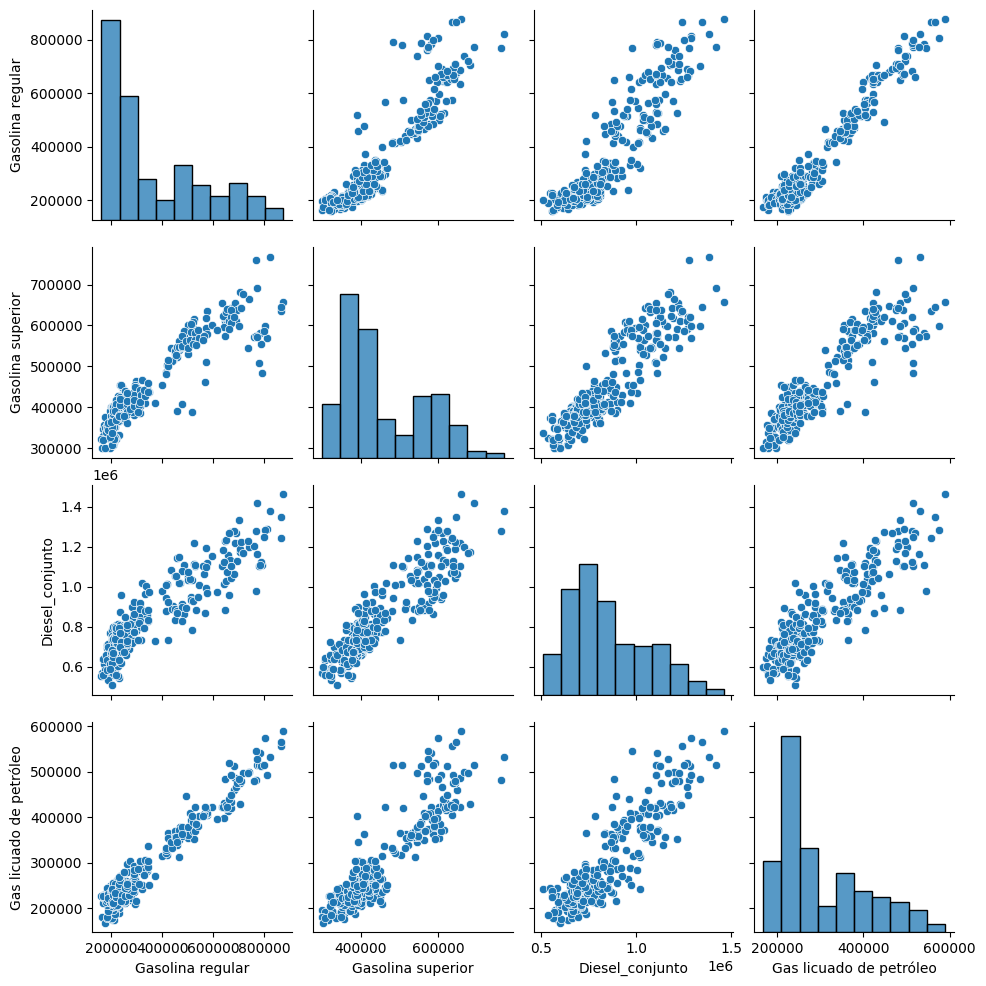

In [90]:
grid = sns.pairplot(consumo_numericas)
plt.show()

In [91]:
normality_test = consumo_numericas.apply(normaltest)
print("Resultados de test de normalidad: \n", normality_test)

Resultados de test de normalidad: 
    Gasolina regular  Gasolina superior  Diesel_conjunto  \
0      3.507221e+01       2.957783e+01        21.627472   
1      2.421952e-08       3.777945e-07         0.000020   

   Gas licuado de petróleo  
0             3.069400e+01  
1             2.162134e-07  


Ninguna de las distribuciones de las variables interesantes es normal.

In [92]:
consumo["Mes"] = consumo["Fecha"].dt.month
consumo["Año"] = consumo["Fecha"].dt.year

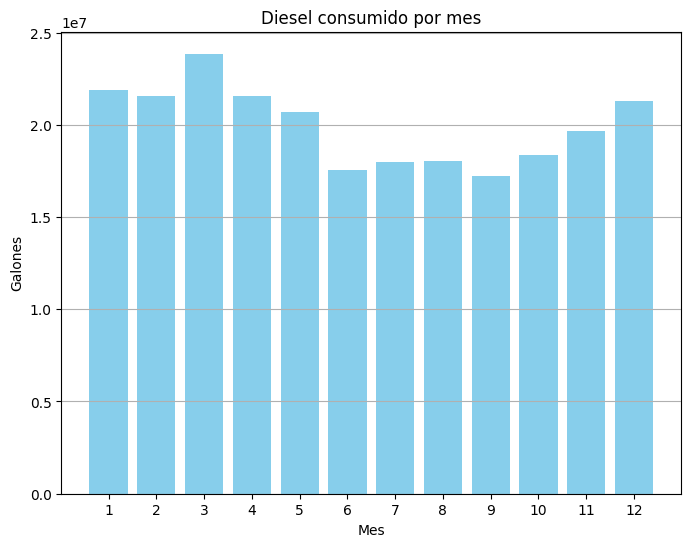

In [99]:
suma_por_mes = consumo.groupby('Mes')['Diesel_conjunto'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Diesel consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

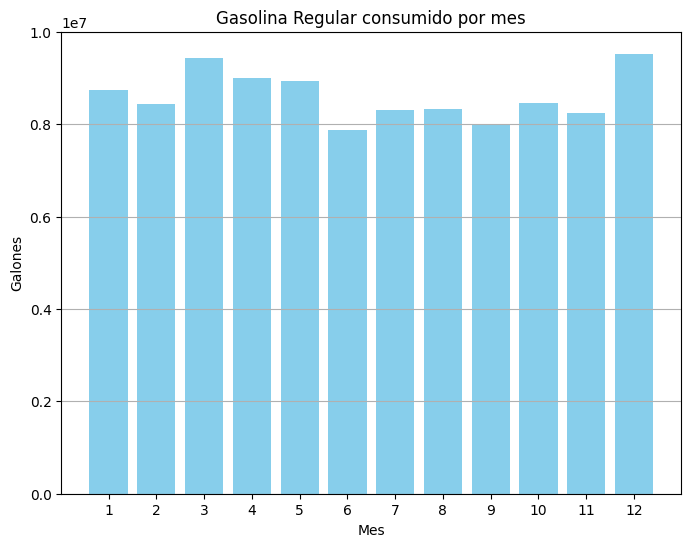

In [101]:
suma_por_mes = consumo.groupby('Mes')['Gasolina regular'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina Regular consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

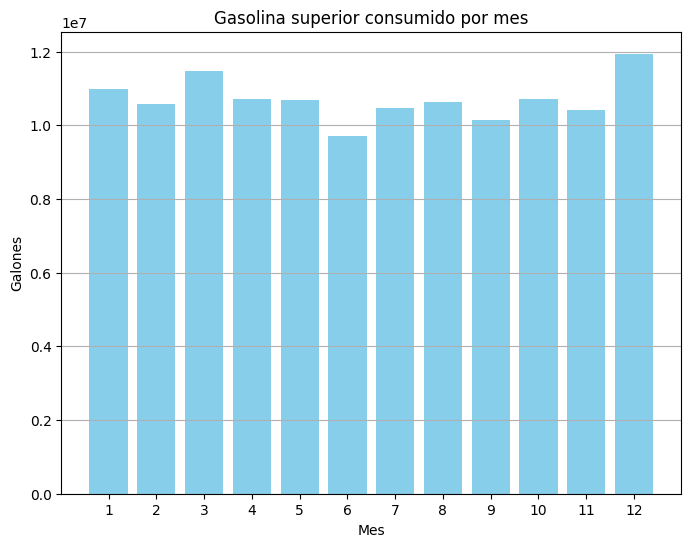

In [102]:
suma_por_mes = consumo.groupby('Mes')['Gasolina superior'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gasolina superior consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

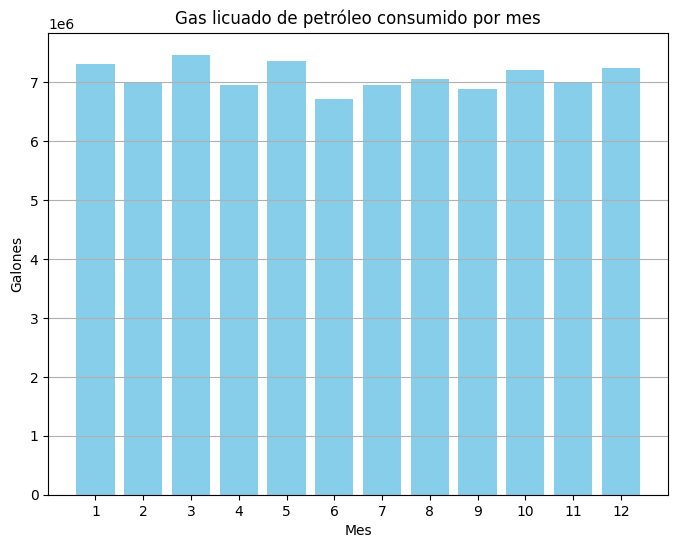

In [106]:
suma_por_mes = consumo.groupby('Mes')['Gas licuado de petróleo'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Mes'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Galones')
plt.title('Gas licuado de petróleo consumido por mes')
plt.xticks(suma_por_mes['Mes'])
plt.grid(axis='y')
plt.show()

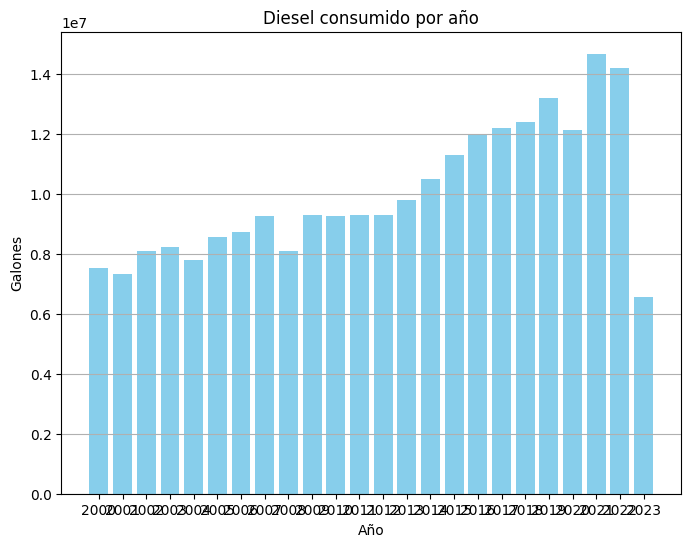

In [108]:
suma_por_mes = consumo.groupby('Año')['Diesel_conjunto'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Diesel consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

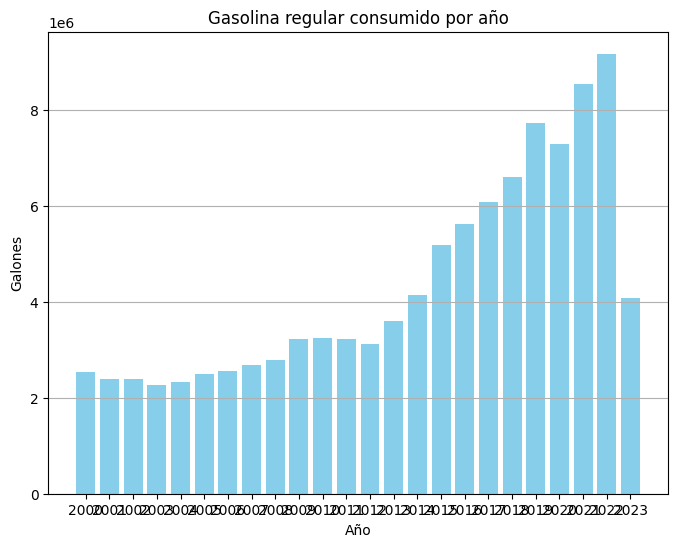

In [109]:
suma_por_mes = consumo.groupby('Año')['Gasolina regular'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gasolina regular consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

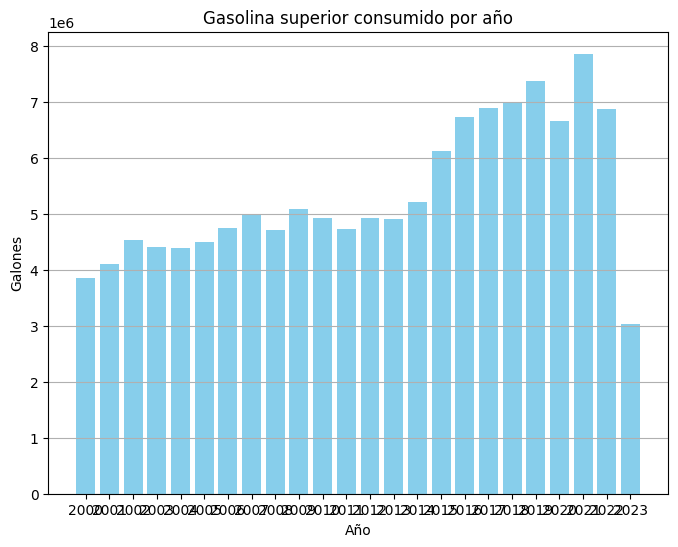

In [110]:
suma_por_mes = consumo.groupby('Año')['Gasolina superior'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gasolina superior consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

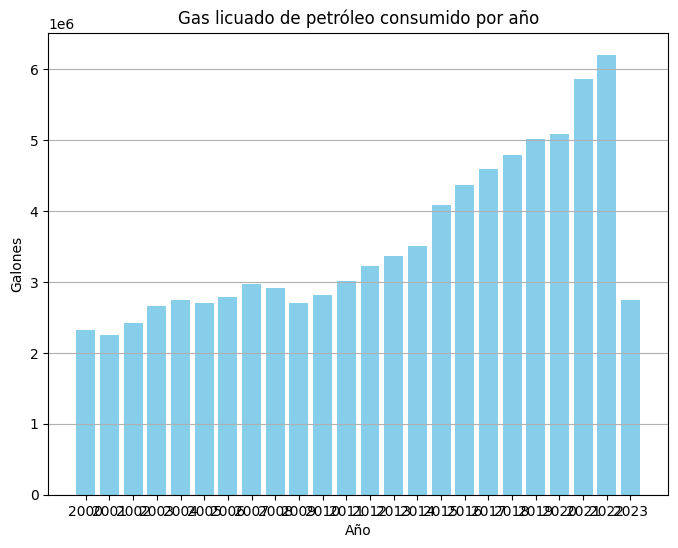

In [111]:
suma_por_mes = consumo.groupby('Año')['Gas licuado de petróleo'].sum().reset_index(name='Suma')

# Graficar la suma por mes usando matplotlib
plt.figure(figsize=(8, 6))
plt.bar(suma_por_mes['Año'], suma_por_mes['Suma'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Galones')
plt.title('Gas licuado de petróleo consumido por año')
plt.xticks(suma_por_mes['Año'])
plt.grid(axis='y')
plt.show()

### 1.2 Importación de combustibles

### 1.3 Precio en Ciudad Capital

## 2. Elección de series de tiempo

* Serie 1: Consumo de diesel
* Serie 2: Importacion de gasolina regular
* Serie 3: Precio de gasolina super

## 3. Análisis de series de tiempo

### 3.1 Consumo de diesel